In [71]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [72]:
def plot_network(G, title):
    """Plots the network."""
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
    plt.title(title)
    plt.show()

In [73]:
def create_graph(cities, path):
    G = nx.DiGraph()
    for n, pos in enumerate(cities):
        G.add_node(n, pos=pos)
    
    for n1, n2 in zip(path, path[1:]):
        G.add_edge(n1, n2)

    return G

In [74]:
def compute_cycle_length(G, cycle):
    """Computes the length of the cycle in the graph."""
    length = 0
    for (id1, id2) in zip(cycle, cycle[1:]):
        pos1 = G.nodes[id1]['pos']
        pos2 = G.nodes[id2]['pos']
        distance = math.sqrt((pos2[0] - pos1[0])**2 + (pos2[1] - pos1[1])**2)
        length += distance
    return length

In [75]:
def draw_statistics(filenameMean, filenameBest, title, end_cutoff):
    __, best = np.loadtxt(filenameBest, skiprows=1, unpack=True)
    __, mean, err = np.loadtxt(filenameMean, skiprows=1, unpack=True)

    #plt.errorbar(range(len(mean[:-2600])), mean[:-2600], yerr=err[:-2600])
    plt.plot(range(len(best[:-end_cutoff])), best[:-end_cutoff], label="Miglior individuo")
    plt.plot(range(len(mean[:-end_cutoff])), mean[:-end_cutoff], label="Media della migliore metà")
    plt.xlabel("Iterazione")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()

In [76]:
cities = np.loadtxt("cities_circle.dat")
#initial_path = np.loadtxt("initial_best_path.dat", skiprows=1, dtype=int)
#initial_path = np.append(initial_path, 0)

In [77]:
best_path = np.loadtxt("path_random_search_circle.dat", skiprows=1, dtype=int)
best_path = np.append(best_path, 0)

In [78]:
best_sol = create_graph(cities, best_path)

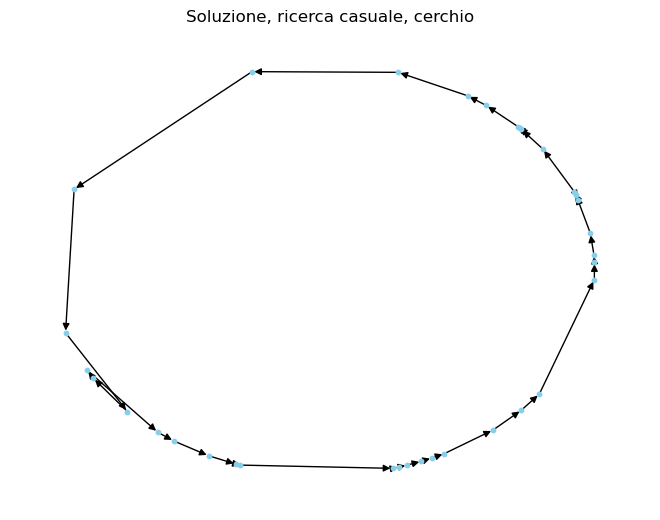

In [79]:
plot_network(best_sol, "Soluzione, ricerca casuale, cerchio")

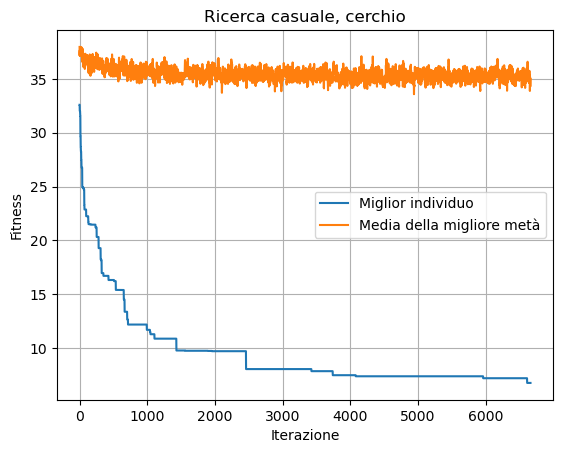

In [80]:
draw_statistics(
    "statistics_random_search_circle.dat",
    "prog_best_random_search_circle.dat",
    "Ricerca casuale, cerchio",
    2950
)

In [81]:
best_path = np.loadtxt("path_genetic_algo_circle.dat", skiprows=1, dtype=int)
best_path = np.append(best_path, 0)

In [82]:
best_sol = create_graph(cities, best_path)

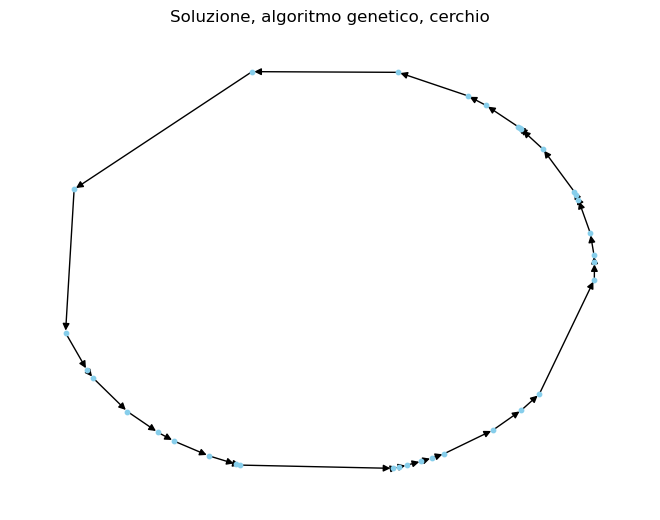

In [83]:
plot_network(best_sol, "Soluzione, algoritmo genetico, cerchio")

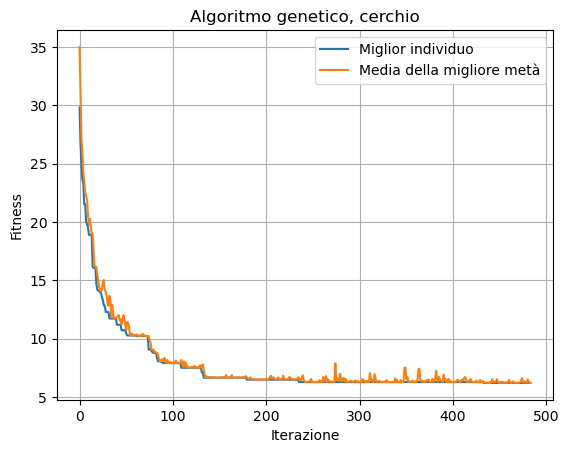

In [84]:
draw_statistics(
    "statistics_genetic_algo_circle.dat",
    "prog_best_genetic_algo_circle.dat",
    "Algoritmo genetico, cerchio",
    2950
)

In [85]:
cities = np.loadtxt("cities_square.dat")

In [86]:
best_path = np.loadtxt("path_random_search_square.dat", skiprows=1, dtype=int)
best_path = np.append(best_path, 0)

In [87]:
best_sol = create_graph(cities, best_path)

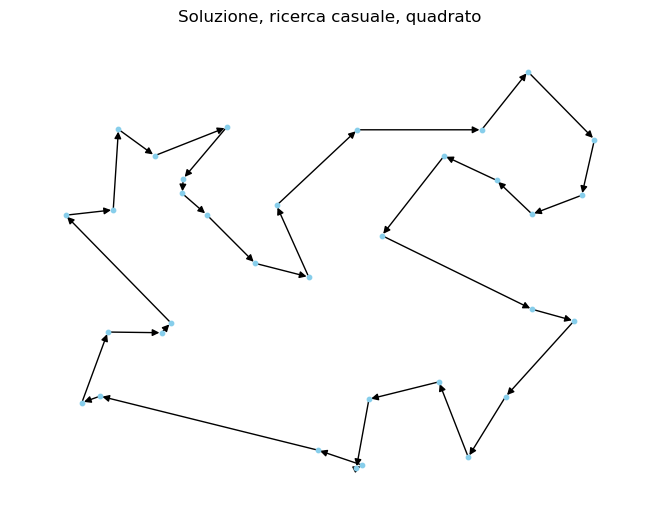

In [88]:
plot_network(best_sol, "Soluzione, ricerca casuale, quadrato")

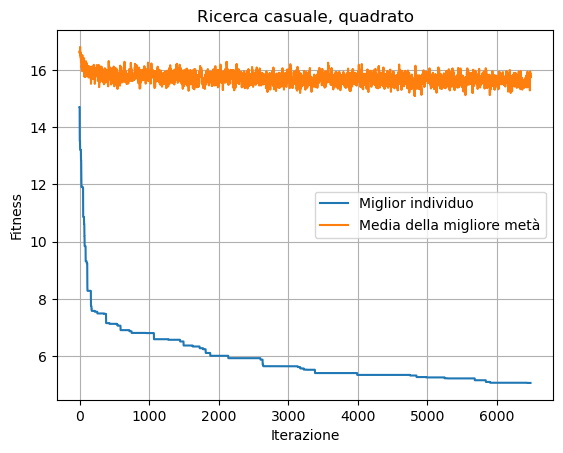

In [89]:
draw_statistics(
    "statistics_random_search_square.dat",
    "prog_best_random_search_square.dat",
    "Ricerca casuale, quadrato",
    2950
)

In [90]:
best_path = np.loadtxt("path_genetic_algo_square.dat", skiprows=1, dtype=int)
best_path = np.append(best_path, 0)

In [91]:
best_sol = create_graph(cities, best_path)

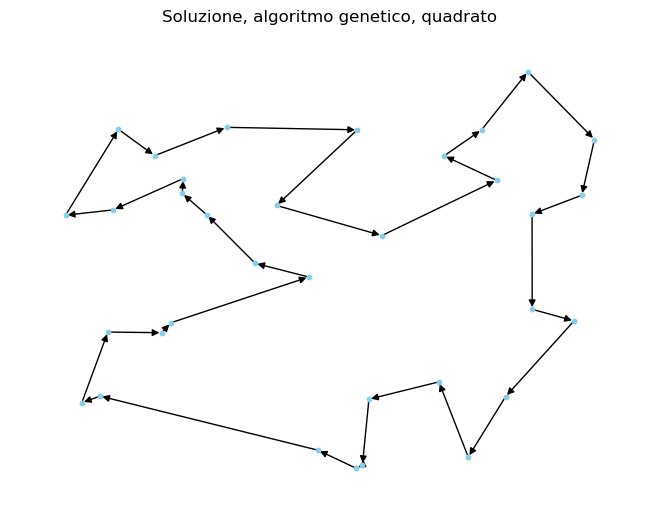

In [92]:
plot_network(best_sol, "Soluzione, algoritmo genetico, quadrato")

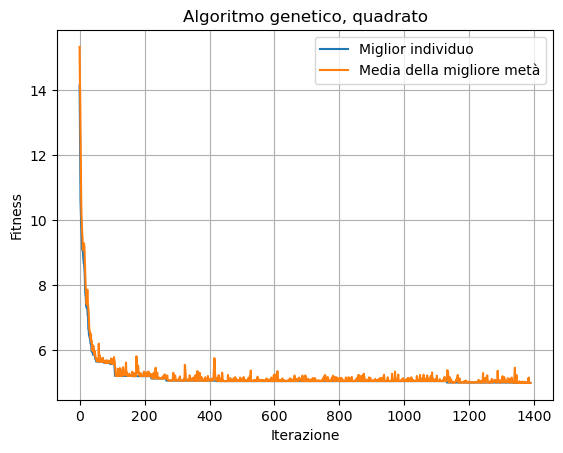

In [93]:
draw_statistics("statistics_genetic_algo_square.dat", "prog_best_genetic_algo_square.dat", "Algoritmo genetico, quadrato", 2950)